In [1]:
import numpy as np

R = np.array([[0.5076271,  0.3434859,  0.7901469],
  [ 0.8382091,  0.0152542, -0.5451356],
  [-0.1992995,  0.9390339, -0.2801695]])

if (R[2,2] < 0):
    if (R[0,0] >R[1,1]):
        t = 1 + R[0,0] -R[1,1] -R[2,2]
        q = np.array([t, R[0,1]+R[1,0], R[2,0]+R[0,2], R[1,2]-R[2,1]])
    else:
        t = 1 -R[0,0] + R[1,1] -R[2,2]
        q = np.array([R[0,1]+R[1,0], t, R[1,2]+R[2,1], R[2,0]-R[0,2]])
else:
    if (R[0,0] < -R[1,1]):
        t = 1 -R[0,0] -R[1,1] + R[2,2]
        q = np.array([R[2,0]+R[0,2], R[1,2]+R[2,1], t, R[0,1]-R[1,0]])
    else:
        t = 1 + R[0,0] + R[1,1] + R[2,2]
        q = np.array([R[1,2]-R[2,1], R[2,0]-R[0,2], R[0,1]-R[1,0], t])
q *= 0.5 / np.sqrt(t)
q

array([ 0.66568431,  0.44378956,  0.22189474, -0.55738489])

In [2]:
from scipy.spatial.transform import Rotation as ScipyRot
plot_lambda_bar = []
rot = ScipyRot.from_matrix(R)
print(rot.as_quat())

[0.66568432 0.44378957 0.22189475 0.5573849 ]


In [3]:
import numpy as np
b_v = np.random.normal(0, 0.1, 100)

In [2]:
import numpy as np
lm = np.transpose(np.array([[2.5, 2.5, 0]]))
p = np.transpose(np.array([[2.5,0,10]]))
p_hat = np.transpose(np.array([[-2, 4, 3]]))
R = np.eye(3)
R_hat = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])
d = np.matmul(np.transpose(R), (p-lm)/np.linalg.norm(p-lm))
Pi = np.eye(3) - np.matmul(d, np.transpose(d))
origin = np.transpose(np.array([[0, 0, 0]]))


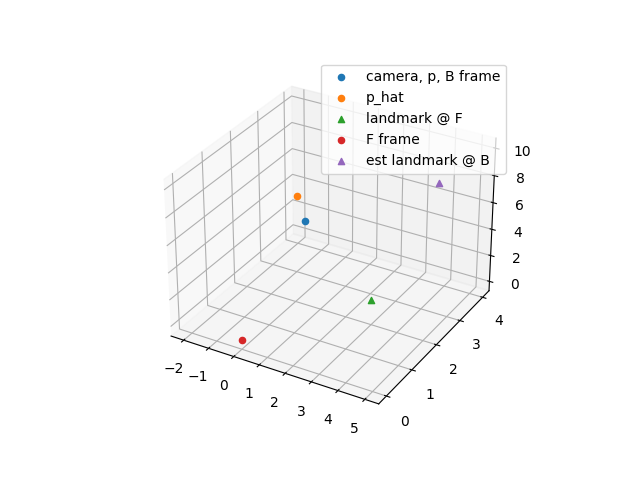

In [18]:
import matplotlib.pyplot as plt
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*p, marker="o", label='camera, p, B frame')
x_axis_rotated = R @ np.array([1, 0, 0])
y_axis_rotated = R @ np.array([0, 1, 0])
z_axis_rotated = R @ np.array([0, 0, 1])

# ax.quiver(*p, *x_axis_rotated, length=0.1, color='r', arrow_length_ratio=0.1, label='X-axis (rotated)')
# ax.quiver(*p, *y_axis_rotated, length=0.1, color='g', arrow_length_ratio=0.1, label='Y-axis (rotated)')
# ax.quiver(*p, *z_axis_rotated, length=0.1, color='b', arrow_length_ratio=0.1, label='Z-axis (rotated)')

ax.scatter(*p_hat, marker="o", label='p_hat')
ax.scatter(*lm, marker='^', label='landmark @ F')
ax.scatter(*origin, marker="o", label='F frame')
est_lm = (np.transpose([np.matmul(np.transpose(R), lm)]) + p)[0]
ax.scatter(*est_lm, marker='^', label='est landmark @ B')
# ax.quiver(*p, *(np.transpose([np.matmul(np.transpose(R_hat), lm)]) + p)[0], length=20, label='est landmark @ B')
# ax.scatter(*(np.transpose([np.matmul(np.transpose(R_hat), p_hat)]) + p)[0], marker="o", label='p_bar_hat')

# ax.quiver(*lm, *d, length=np.linalg.norm(d)*10, color='r', arrow_length_ratio=0.1)
# projected_vector = Pi @ (np.matmul(np.transpose(R_hat), p_hat) - np.matmul(np.transpose(R_hat), lm))
# projected_vector = np.matmul(Pi , np.matmul(np.transpose(R_hat), lm))
# projected_vector2 = np.matmul(Pi , np.matmul(np.transpose(R_hat), p_hat))
# ax.quiver(*lm, *projected_vector, length=np.linalg.norm(projected_vector)/8, color='b', arrow_length_ratio=0.1, label='Projected Vector')
# ax.quiver(*p, *projected_vector2, length=np.linalg.norm(projected_vector2), arrow_length_ratio=0.1, label='Projected Vector2')
# ax.quiver(*lm, *d, length=10, color='r', arrow_length_ratio=0.1)
ax.legend()